In [1]:
import pandas as pd
import os

# --- 1. Define File Path ---
# This assumes your notebook is in the root of your project directory.
file_path = os.path.join('data', 'raw', 'deliverytime.csv')

# --- 2. Load the Data ---
# It's good practice to use a try-except block to handle potential errors like the file not being found.
try:
    df = pd.read_csv(file_path)
    print("✅ Data loaded successfully!")
except FileNotFoundError:
    print(f"❌ Error: The file was not found at {file_path}")
    print("Please make sure the file path and name are correct.")
    df = None

# --- 3. Initial Inspection (if data loaded successfully) ---
if df is not None:
    # Print the first 5 rows to get a feel for the data
    print("\n--- First 5 Rows ---")
    print(df.head())

    # Get a concise summary of the dataframe (columns, data types, non-null values)
    print("\n--- Dataset Info ---")
    df.info()

    # Get descriptive statistics for numerical columns
    print("\n--- Statistical Summary ---")
    print(df.describe())

    # Check for the number of missing values in each column
    print("\n--- Missing Values Check ---")
    print(df.isnull().sum())

C:\Users\baris\AppData\Local\Temp\ipykernel_1372\1204621371.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


✅ Data loaded successfully!

--- First 5 Rows ---
     ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
0  4607     INDORES13DEL02                   37                      4.9   
1  B379     BANGRES18DEL02                   34                      4.5   
2  5D6D     BANGRES19DEL01                   23                      4.4   
3  7A6A    COIMBRES13DEL02                   38                      4.7   
4  70A2     CHENRES12DEL01                   32                      4.6   

   Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0            22.745049             75.892471                   22.765049   
1            12.913041             77.683237                   13.043041   
2            12.914264             77.678400                   12.924264   
3            11.003669             76.976494                   11.053669   
4            12.972793             80.249982                   13.012793   

   Delivery_location_longitude Type_

In [3]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


✅ Column names cleaned and data types checked.


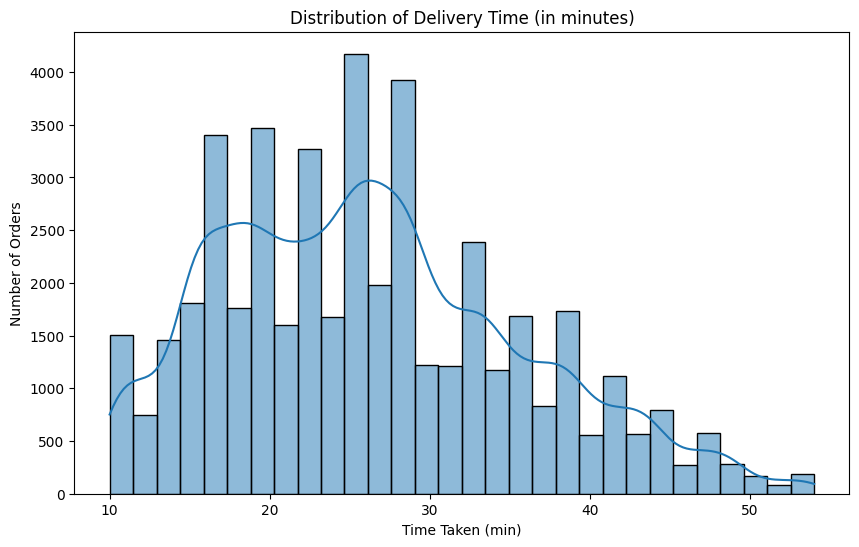

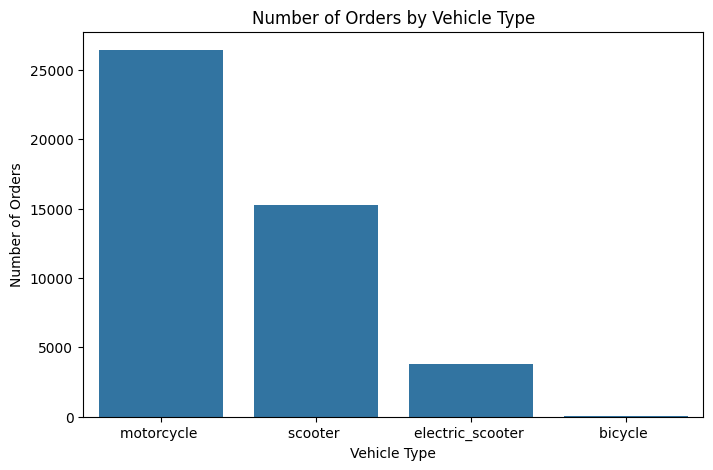

In [4]:
# We need these libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Data Cleaning ---

# The column name 'Time_taken(min)' is a bit awkward. Let's rename it.
df.rename(columns={'Time_taken(min)': 'Time_taken_min'}, inplace=True)

# The dataset is clean of nulls, but let's ensure data types are correct.
# Sometimes 'Age' and 'Ratings' can be loaded as text. This converts them to numbers.
# 'coerce' will turn any non-numeric values into 'NaN' (Not a Number), which we can then handle.
df['Delivery_person_Age'] = pd.to_numeric(df['Delivery_person_Age'], errors='coerce')
df['Delivery_person_Ratings'] = pd.to_numeric(df['Delivery_person_Ratings'], errors='coerce')
df['Time_taken_min'] = pd.to_numeric(df['Time_taken_min'], errors='coerce')

# Let's drop any rows that might have been broken during conversion (if any)
df.dropna(inplace=True)

print("✅ Column names cleaned and data types checked.")


# --- 2. Univariate Analysis (Analyzing one feature at a time) ---

# Let's see the distribution of delivery times.
plt.figure(figsize=(10, 6))
sns.histplot(df['Time_taken_min'], bins=30, kde=True)
plt.title('Distribution of Delivery Time (in minutes)')
plt.xlabel('Time Taken (min)')
plt.ylabel('Number of Orders')
plt.show()

# Let's see how many orders are handled by each vehicle type.
plt.figure(figsize=(8, 5))
sns.countplot(x='Type_of_vehicle', data=df, order = df['Type_of_vehicle'].value_counts().index)
plt.title('Number of Orders by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Orders')
plt.show()

In [6]:
# This is a great trick: it removes any accidental leading/trailing spaces from all column names
df.columns = df.columns.str.strip()

# Now, print all the column names to see the correct one for weather
print("Available columns are:")
print(df.columns)

Available columns are:
Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Type_of_order', 'Type_of_vehicle',
       'Time_taken_min', 'distance_km'],
      dtype='object')


Defaulting to user installation because normal site-packages is not writeable
✅ 'distance_km' feature created successfully.
   distance_km  Time_taken_min
0     3.025153              24
1    20.183558              33
2     1.552760              26
3     7.790412              21
4     6.210147              30


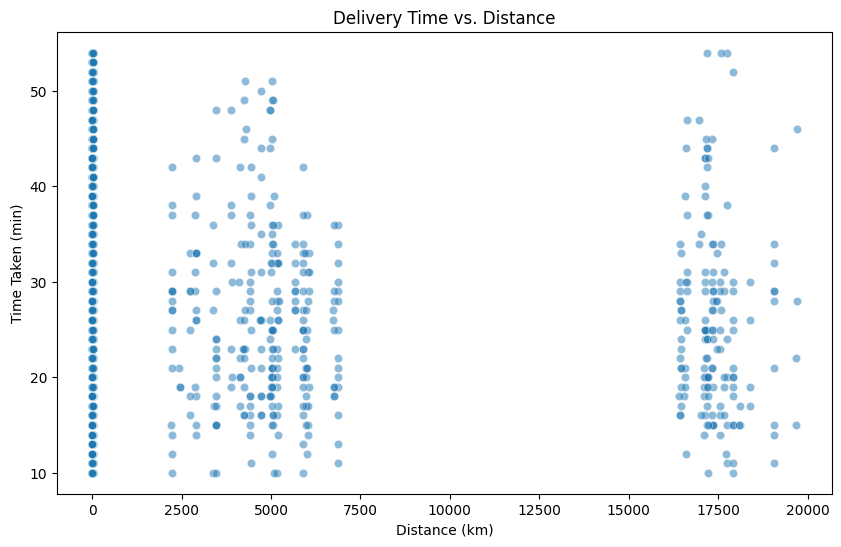

In [7]:
# First, you might need to install the 'haversine' library to calculate distances
!pip install haversine

from haversine import haversine, Unit
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Feature Engineering: Calculate Delivery Distance ---

# A function to calculate distance for each row
def calculate_distance(row):
    restaurant_coords = (row['Restaurant_latitude'], row['Restaurant_longitude'])
    delivery_coords = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
    return haversine(restaurant_coords, delivery_coords, unit=Unit.KILOMETERS)

# Apply the function to the dataframe to create the new 'distance_km' column
df['distance_km'] = df.apply(calculate_distance, axis=1)

print("✅ 'distance_km' feature created successfully.")
print(df[['distance_km', 'Time_taken_min']].head())


# --- 2. Bivariate Analysis: Plotting Relationships ---

# Relationship between Distance and Delivery Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_km', y='Time_taken_min', data=df, alpha=0.5)
plt.title('Delivery Time vs. Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Time Taken (min)')
plt.show()

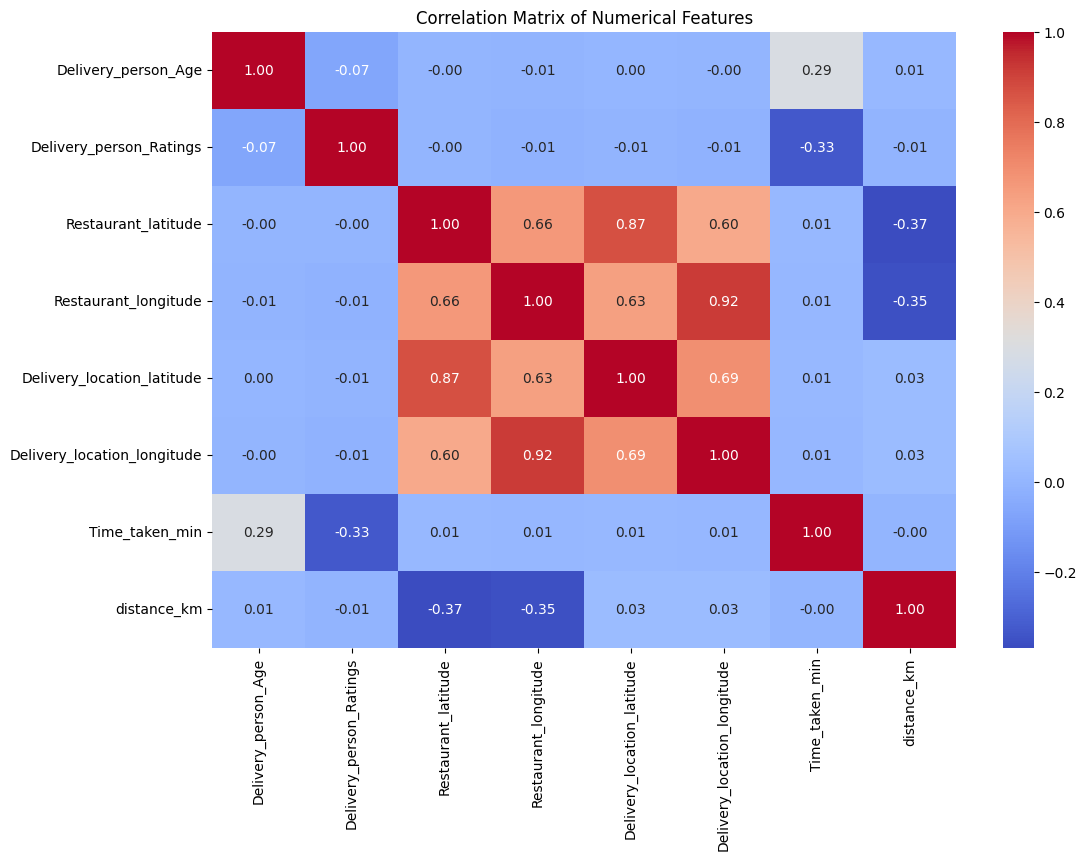

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numerical columns for the correlation matrix
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [9]:
# --- 1. Select Features ---
# We will use these columns to predict the delivery time.
# We drop IDs and lat/lon because distance_km already captures the location info.
features = df.drop(columns=['ID', 'Delivery_person_ID', 'Restaurant_latitude', 'Restaurant_longitude', 
                            'Delivery_location_latitude', 'Delivery_location_longitude', 'Time_taken_min'])

# --- 2. One-Hot Encode Categorical Features ---
# pd.get_dummies() converts categorical variables into columns of 0s and 1s.
features_encoded = pd.get_dummies(features, drop_first=True)

# --- 3. Define Final Features (X) and Target (y) ---
X = features_encoded
y = df['Time_taken_min']

# Display the first few rows of our final prepared data
print("✅ Data is now ready for modeling.")
print("\nFeatures (X) head:")
print(X.head())
print("\nTarget (y) head:")
print(y.head())

✅ Data is now ready for modeling.

Features (X) head:
   Delivery_person_Age  Delivery_person_Ratings  distance_km  \
0                   37                      4.9     3.025153   
1                   34                      4.5    20.183558   
2                   23                      4.4     1.552760   
3                   38                      4.7     7.790412   
4                   32                      4.6     6.210147   

   Type_of_order_Drinks   Type_of_order_Meal   Type_of_order_Snack   \
0                  False                False                  True   
1                  False                False                  True   
2                   True                False                 False   
3                  False                False                 False   
4                  False                False                  True   

   Type_of_vehicle_electric_scooter   Type_of_vehicle_motorcycle   \
0                              False                         True

In [11]:
!pip install scikit-learn lightgbm

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/8.7 MB 10.1 MB/s eta 0:00:01
   -------------- ------------------------- 3.1/8.7 MB 9.7 MB/s eta 0:00:01
   -------------------- ------------------- 4.5/8.7 MB 8.9 MB/s eta 0:00:01
   ------------------------- -------------- 5.5/8.7 MB 7.5 MB/s eta 0:00:01
   ---------------------------- ----------- 6.3/8.7 MB 6.7 MB/s eta 0:00:01
   ------------------------------- -------- 6.8/8.7 MB 5.8 MB/s eta 0:00:01
   --------------------------------- ------ 7.3/8.7 MB 5.4 MB/s eta 0:00:01
   ------------------------------------- -- 8.1/8.7 MB 4.9 MB/s eta 0:00:01
   ---------------------------------------  8.7/8.7 MB 4.7 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 4.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------- -----

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# --- 1. Split the Data into Training and Testing Sets ---
# We'll use 80% of the data for training and 20% for testing.
# random_state ensures we get the same split every time we run the code.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"✅ Data split successfully: {len(X_train)} training samples and {len(X_test)} test samples.")


# --- 2. Train a Baseline Model: Linear Regression ---
print("\n--- Training Linear Regression Model ---")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_predictions = lr_model.predict(X_test)

# Evaluate the model
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))

print(f"Linear Regression MAE: {lr_mae:.2f} minutes")
print(f"Linear Regression RMSE: {lr_rmse:.2f} minutes")


# --- 3. Train an Advanced Model: LightGBM ---
print("\n--- Training LightGBM Model ---")
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)

# Make predictions on the test set
lgbm_predictions = lgbm_model.predict(X_test)

# Evaluate the model
lgbm_mae = mean_absolute_error(y_test, lgbm_predictions)
lgbm_rmse = np.sqrt(mean_squared_error(y_test, lgbm_predictions))

print(f"LightGBM MAE: {lgbm_mae:.2f} minutes")
print(f"LightGBM RMSE: {lgbm_rmse:.2f} minutes")

✅ Data split successfully: 36474 training samples and 9119 test samples.

--- Training Linear Regression Model ---
Linear Regression MAE: 6.61 minutes
Linear Regression RMSE: 8.36 minutes

--- Training LightGBM Model ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 36474, number of used features: 9
[LightGBM] [Info] Start training from score 26.301612
LightGBM MAE: 5.67 minutes
LightGBM RMSE: 7.20 minutes


--- Starting Hyperparameter Tuning ---
Fitting 3 folds for each of 15 candidates, totalling 45 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 36474, number of used features: 9
[LightGBM] [Info] Start training from score 26.301612

--- Tuning Finished ---
Best Hyperparameters found:
{'num_leaves': 31, 'n_estimators': 500, 'max_depth': -1, 'learning_rate': 0.01, 'colsample_bytree': 1.0}

Tuned LightGBM MAE: 5.66 minutes
Tuned LightGBM RMSE: 7.20 minutes


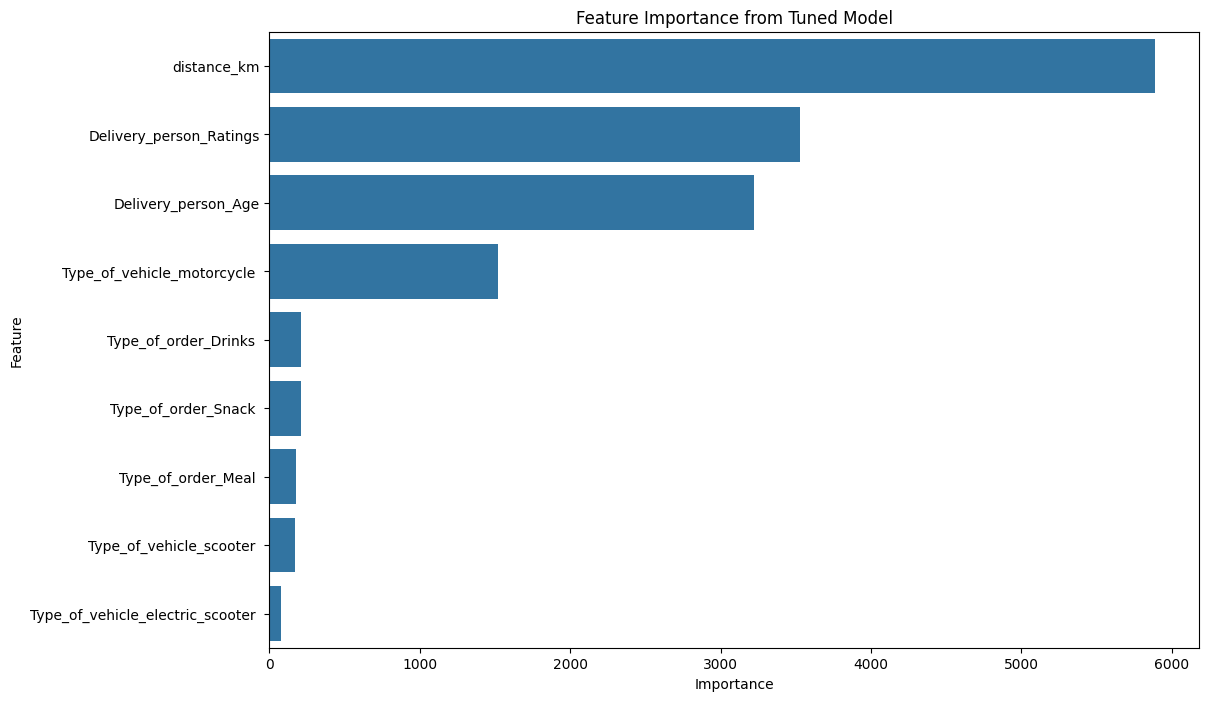

In [13]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# --- 1. Define the Hyperparameter Grid ---
# These are some of the most important settings for the LightGBM model.
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 40],
    'max_depth': [-1, 10, 20],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# --- 2. Set up Randomized Search ---
# This will try 15 different combinations from the grid above using 3-fold cross-validation.
lgbm = LGBMRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=15,
    cv=3,
    scoring='neg_mean_absolute_error', # We want to minimize MAE
    n_jobs=-1, # Use all available CPU cores
    random_state=42,
    verbose=1 # Shows progress
)

print("--- Starting Hyperparameter Tuning ---")
random_search.fit(X_train, y_train)

print("\n--- Tuning Finished ---")
print("Best Hyperparameters found:")
print(random_search.best_params_)

# --- 3. Evaluate the Tuned Model ---
best_model = random_search.best_estimator_
tuned_predictions = best_model.predict(X_test)

tuned_mae = mean_absolute_error(y_test, tuned_predictions)
tuned_rmse = np.sqrt(mean_squared_error(y_test, tuned_predictions))

print(f"\nTuned LightGBM MAE: {tuned_mae:.2f} minutes")
print(f"Tuned LightGBM RMSE: {tuned_rmse:.2f} minutes")

# --- 4. Feature Importance ---
# Let's see which features the model found most predictive.
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importance from Tuned Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [14]:
import joblib

# Save the model object to a file
joblib.dump(best_model, 'delivery_time_model.pkl')

# Save the list of feature columns
# The model needs to see new data with these exact columns in this exact order
model_columns = list(X_train.columns)
joblib.dump(model_columns, 'model_columns.pkl')

print("✅ Model and column list saved successfully.")

✅ Model and column list saved successfully.


In [15]:
# --- app.py ---

import joblib
import pandas as pd
from fastapi import FastAPI
from pydantic import BaseModel

# 1. Initialize the FastAPI app
app = FastAPI()

# 2. Load the trained model and columns
model = joblib.load('delivery_time_model.pkl')
model_columns = joblib.load('model_columns.pkl')

# 3. Define the input data structure using Pydantic
class DeliveryData(BaseModel):
    Delivery_person_Age: int
    Delivery_person_Ratings: float
    distance_km: float
    Type_of_order: str # e.g., "Snack ", "Drinks", "Buffet", "Meal"
    Type_of_vehicle: str # e.g., "motorcycle", "scooter", "electric_scooter"

# 4. Create the /predict endpoint
@app.post('/predict')
def predict_delivery_time(data: DeliveryData):
    # Convert incoming data into a pandas DataFrame
    input_data = pd.DataFrame([data.dict()])
    
    # One-hot encode the categorical features
    # This must match the encoding done during training
    input_data = pd.get_dummies(input_data)
    
    # Reindex the DataFrame to match the model's expected columns
    # This adds missing columns (with a value of 0) and ensures the correct order
    input_data = input_data.reindex(columns=model_columns, fill_value=0)
    
    # Make a prediction
    prediction = model.predict(input_data)
    
    # Return the prediction
    return {'predicted_delivery_time_min': round(prediction[0], 2)}

In [16]:
pip install fastapi uvicorn python-multipart

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


SyntaxError: invalid syntax (1223348983.py, line 1)